

<br />  <center> Assignment # 4   </center>

<center> <img src="LessthanHSandProfessional.png" width="1000"> </center>

 **Educational Attainment Data** 
>I realized that my interest in exploring COVID-19 impacts on job loss in Los Angeles County is too ambitious and finding data at the neighborhood level is unrealistic. I decided to broaden my initial research questions and examine possibly job loss at the Los Angeles County level.<br />  
In this notebook, I will analyze Educational Attainment in Los Angeles County. With COVID-19 shifting how many jobs performed, the census tract's educational attainment can help provide more insight into the areas where people might not likely hold positions that can change to work from home. Therefore, I want to look at LA County's regions and see where people live that contain less than a high school degree and a high school degree.<br />  
<br />  *Outline*<br /> 
 1. Upload and Check Files
 2. Cleaning the Data
 3. Adding Percentage Columns
 4. Charts
 5. Maps

# Uploading data 

In the following cell, I will import libraries to explore the census data. 

In [4]:
import geopandas as gpd
import fiona
import folium
import matplotlib.pyplot as plt
import contextily as ctx

In the cell below, I am importing the data I gathered from [Census Reporter](https://censusreporter.org/data/table/?table=B06009&geo_ids=05000US06037,140|05000US06037&primary_geo_id=05000US06037).

**I also run some codes to ensure I correctly uploaded the file and find out what was uploaded.** 

In [5]:
educ = gpd.read_file('data/acs2019_5yr_B06009_14000US06037534001.geojson')

In [6]:
type(educ)

geopandas.geodataframe.GeoDataFrame

In [7]:
educ.head (5)

geoid                                   name  B06009001  \
0        05000US06037                 Los Angeles County, CA  6886895.0   
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     3118.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     2687.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     4216.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     2646.0   

   B06009001, Error  B06009002  B06009002, Error  B06009003  B06009003, Error  \
0               0.0  1437059.0            7918.0  1419449.0           10243.0   
1             312.0      473.0             165.0      750.0             169.0   
2             228.0      164.0              79.0      727.0             216.0   
3             363.0      677.0             257.0      996.0             253.0   
4             195.0      527.0             120.0      724.0             176.0   

   B06009004  B06009004, Error  ...  B06009026, Error  B06009027  \
0  1789308.0            8631.0  ...            7716.0   653313.0   
1     1166.0             258.0  ...             146.0      271.0   
2      923.0             150.0  ...              32.0      172.0   
3     1564.0             273.0  ...             255.0      757.0   
4      774.0             146.0  ...             104.0      493.0   

   B06009027, Error  B06009028  B06009028, Error  B06009029  B06009029, Error  \
0            6634.0   575301.0            5245.0   536174.0            5517.0   
1             126.0      459.0             190.0      191.0              83.0   
2              76.0      310.0             106.0      167.0             104.0   
3             222.0     1044.0             206.0      290.0             129.0   
4             166.0      399.0             115.0      171.0              75.0   

   B06009030  B06009030, Error  \
0   266360.0            3820.0   
1      116.0              56.0   
2      125.0              74.0   
3      188.0             113.0   
4      162.0              85.0   

                                            geometry  
0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  

[5 rows x 63 columns]

In [8]:
list (educ)

['geoid',
 'name',
 'B06009001',
 'B06009001, Error',
 'B06009002',
 'B06009002, Error',
 'B06009003',
 'B06009003, Error',
 'B06009004',
 'B06009004, Error',
 'B06009005',
 'B06009005, Error',
 'B06009006',
 'B06009006, Error',
 'B06009007',
 'B06009007, Error',
 'B06009008',
 'B06009008, Error',
 'B06009009',
 'B06009009, Error',
 'B06009010',
 'B06009010, Error',
 'B06009011',
 'B06009011, Error',
 'B06009012',
 'B06009012, Error',
 'B06009013',
 'B06009013, Error',
 'B06009014',
 'B06009014, Error',
 'B06009015',
 'B06009015, Error',
 'B06009016',
 'B06009016, Error',
 'B06009017',
 'B06009017, Error',
 'B06009018',
 'B06009018, Error',
 'B06009019',
 'B06009019, Error',
 'B06009020',
 'B06009020, Error',
 'B06009021',
 'B06009021, Error',
 'B06009022',
 'B06009022, Error',
 'B06009023',
 'B06009023, Error',
 'B06009024',
 'B06009024, Error',
 'B06009025',
 'B06009025, Error',
 'B06009026',
 'B06009026, Error',
 'B06009027',
 'B06009027, Error',
 'B06009028',
 'B06009028, Error',
 

- In the cell below, I drop the first row in the data as it can skew the data. 

In [9]:
educ.drop ([0])

geoid                                   name  B06009001  \
1     14000US06037101110  Census Tract 1011.10, Los Angeles, CA     3118.0   
2     14000US06037101122  Census Tract 1011.22, Los Angeles, CA     2687.0   
3     14000US06037101210  Census Tract 1012.10, Los Angeles, CA     4216.0   
4     14000US06037101220  Census Tract 1012.20, Los Angeles, CA     2646.0   
5     14000US06037101300     Census Tract 1013, Los Angeles, CA     3263.0   
...                  ...                                    ...        ...   
2342  14000US06037980031  Census Tract 9800.31, Los Angeles, CA     1088.0   
2343  14000US06037980033  Census Tract 9800.33, Los Angeles, CA       16.0   
2344  14000US06037990100     Census Tract 9901, Los Angeles, CA        0.0   
2345  14000US06037990200     Census Tract 9902, Los Angeles, CA        0.0   
2346  14000US06037990300     Census Tract 9903, Los Angeles, CA        0.0   

      B06009001, Error  B06009002  B06009002, Error  B06009003  \
1                312.0      473.0             165.0      750.0   
2                228.0      164.0              79.0      727.0   
3                363.0      677.0             257.0      996.0   
4                195.0      527.0             120.0      724.0   
5                335.0      334.0             156.0      852.0   
...                ...        ...               ...        ...   
2342             148.0       87.0              66.0      512.0   
2343              23.0        0.0              12.0        0.0   
2344              12.0        0.0              12.0        0.0   
2345              12.0        0.0              12.0        0.0   
2346              12.0        0.0              12.0        0.0   

      B06009003, Error  B06009004  B06009004, Error  ...  B06009026, Error  \
1                169.0     1166.0             258.0  ...             146.0   
2                216.0      923.0             150.0  ...              32.0   
3                253.0     1564.0             273.0  ...             255.0   
4                176.0      774.0             146.0  ...             104.0   
5                209.0     1058.0             221.0  ...             108.0   
...                ...        ...               ...  ...               ...   
2342              98.0      332.0              82.0  ...              31.0   
2343              12.0       16.0              23.0  ...              12.0   
2344              12.0        0.0              12.0  ...              12.0   
2345              12.0        0.0              12.0  ...              12.0   
2346              12.0        0.0              12.0  ...              12.0   

      B06009027  B06009027, Error  B06009028  B06009028, Error  B06009029  \
1         271.0             126.0      459.0             190.0      191.0   
2         172.0              76.0      310.0             106.0      167.0   
3         757.0             222.0     1044.0             206.0      290.0   
4         493.0             166.0      399.0             115.0      171.0   
5         374.0             140.0      592.0             149.0      206.0   
...         ...               ...        ...               ...        ...   
2342       49.0              40.0       26.0              25.0       35.0   
2343        0.0              12.0        0.0              12.0        0.0   
2344        0.0              12.0        0.0              12.0        0.0   
2345        0.0              12.0        0.0              12.0        0.0   
2346        0.0              12.0        0.0              12.0        0.0   

      B06009029, Error  B06009030  B06009030, Error  \
1                 83.0      116.0              56.0   
2                104.0      125.0              74.0   
3                129.0      188.0             113.0   
4                 75.0      162.0              85.0   
5                105.0      204.0              94.0   
...                ...        ...               ...   
2342              35.0        0.0         

In [10]:
educ = educ.drop ([0])

- After I drop the first row, I redefine the *educ* label. To make sure that the row was dropped correctly, I check the file by looking at the top rows with educ.head.

In [11]:
educ.head ()

geoid                                   name  B06009001  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     3118.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     2687.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     4216.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     2646.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA     3263.0   

   B06009001, Error  B06009002  B06009002, Error  B06009003  B06009003, Error  \
1             312.0      473.0             165.0      750.0             169.0   
2             228.0      164.0              79.0      727.0             216.0   
3             363.0      677.0             257.0      996.0             253.0   
4             195.0      527.0             120.0      724.0             176.0   
5             335.0      334.0             156.0      852.0             209.0   

   B06009004  B06009004, Error  ...  B06009026, Error  B06009027  \
1     1166.0             258.0  ...             146.0      271.0   
2      923.0             150.0  ...              32.0      172.0   
3     1564.0             273.0  ...             255.0      757.0   
4      774.0             146.0  ...             104.0      493.0   
5     1058.0             221.0  ...             108.0      374.0   

   B06009027, Error  B06009028  B06009028, Error  B06009029  B06009029, Error  \
1             126.0      459.0             190.0      191.0              83.0   
2              76.0      310.0             106.0      167.0             104.0   
3             222.0     1044.0             206.0      290.0             129.0   
4             166.0      399.0             115.0      171.0              75.0   
5             140.0      592.0             149.0      206.0             105.0   

   B06009030  B06009030, Error  \
1      116.0              56.0   
2      125.0              74.0   
3      188.0             113.0   
4      162.0              85.0   
5      204.0              94.0   

                                            geometry  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
5  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...  

[5 rows x 63 columns]

In [12]:
list (educ)

['geoid',
 'name',
 'B06009001',
 'B06009001, Error',
 'B06009002',
 'B06009002, Error',
 'B06009003',
 'B06009003, Error',
 'B06009004',
 'B06009004, Error',
 'B06009005',
 'B06009005, Error',
 'B06009006',
 'B06009006, Error',
 'B06009007',
 'B06009007, Error',
 'B06009008',
 'B06009008, Error',
 'B06009009',
 'B06009009, Error',
 'B06009010',
 'B06009010, Error',
 'B06009011',
 'B06009011, Error',
 'B06009012',
 'B06009012, Error',
 'B06009013',
 'B06009013, Error',
 'B06009014',
 'B06009014, Error',
 'B06009015',
 'B06009015, Error',
 'B06009016',
 'B06009016, Error',
 'B06009017',
 'B06009017, Error',
 'B06009018',
 'B06009018, Error',
 'B06009019',
 'B06009019, Error',
 'B06009020',
 'B06009020, Error',
 'B06009021',
 'B06009021, Error',
 'B06009022',
 'B06009022, Error',
 'B06009023',
 'B06009023, Error',
 'B06009024',
 'B06009024, Error',
 'B06009025',
 'B06009025, Error',
 'B06009026',
 'B06009026, Error',
 'B06009027',
 'B06009027, Error',
 'B06009028',
 'B06009028, Error',
 

- I want to clean the data next and to do this I need to check the markdown file and what information is in each of the rows above. 

# Cleaning the Data
>In the following cells, I clean the data; this will make it possible to analyze the data and understand what information is available in the file. 

1. Clean the columns, by removing unnecessary data.
2. Rename the *educ* label with the columns I am keeping.
3. Rename the columns, with the metadata file column names.


In [13]:
columns_to_keep = ['geoid', 
                   'name', 
                   'B06009001',
                   'B06009002',
                   'B06009003',
                   'B06009004',
                   'B06009005',
                   'B06009006',
                   'B06009007',
                   'B06009008',
                   'B06009009',
                   'B06009010',
                   'B06009011',
                   'B06009012',
                   'B06009013',
                   'B06009014',
                   'B06009015',
                   'B06009016',
                   'B06009017',
                   'B06009018',
                   'B06009019',
                   'B06009020',
                   'B06009021',
                   'B06009022',
                   'B06009023',
                   'B06009024',
                   'B06009025',
                   'B06009026',
                   'B06009027',
                   'B06009028',
                   'B06009029',
                   'B06009030',
                   'geometry']

In [14]:
educ = educ [columns_to_keep]

In [15]:
educ.head ()

geoid                                   name  B06009001  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     3118.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     2687.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     4216.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     2646.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA     3263.0   

   B06009002  B06009003  B06009004  B06009005  B06009006  B06009007  \
1      473.0      750.0     1166.0      486.0      243.0     1211.0   
2      164.0      727.0      923.0      511.0      362.0     1163.0   
3      677.0      996.0     1564.0      694.0      285.0      895.0   
4      527.0      724.0      774.0      404.0      217.0      634.0   
5      334.0      852.0     1058.0      519.0      500.0     1030.0   

   B06009008  ...  B06009022  B06009023  B06009024  B06009025  B06009026  \
1      141.0  ...       15.0        0.0        0.0     1346.0      309.0   
2      119.0  ...        0.0       29.0        0.0      802.0       28.0   
3       39.0  ...       14.0        0.0        0.0     2903.0      624.0   
4       67.0  ...        0.0        0.0        0.0     1658.0      433.0   
5       78.0  ...       26.0        9.0        0.0     1632.0      256.0   

   B06009027  B06009028  B06009029  B06009030  \
1      271.0      459.0      191.0      116.0   
2      172.0      310.0      167.0      125.0   
3      757.0     1044.0      290.0      188.0   
4      493.0      399.0      171.0      162.0   
5      374.0      592.0      206.0      204.0   

                                            geometry  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
5  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...  

[5 rows x 33 columns]

In [16]:
educ.columns = ['geoid', 
                   'name',
               'total',
               'Less than high school graduate',
               'High school graduate-includes equivalency',
               'Some college or associates degree',
               'Bachelors degree',
               'Graduate or professional degree',
               'Born in state of residence-BIS',
               'Less than high school graduate-BIS',
               'High school graduate-includes equivalency-BIS',
               'Some college or associates degree-BIS',
                'Bachelors degree-BIS',
                'Graduate or professional degree-BIS',
                'Born in other state in the United States-BIO',
                'Less than high school graduate-BIS',
                'High school graduate-includes equivalency-BIO',
                'Some college or associates degree-BIO',
                'Bachelors degree-BIO',
                'Graduate or professional degree-BIO',
                'Native; born outside the United States-NBO',
                'Less than high school graduate-NBO',
                'High school graduate-includes equivalency-NBO',
                'Some college or associates degree-NBO',
                'Bachelors degree-NBO',
                'Graduate or professional degree-NBO',
                'Foreign born-FB',
                'Less than high school graduate-FB',
                'High school graduate-includes equivalency-FB',
                'Some college or associates degree-FB',
                'Bachelors degree-FB',
                'Graduate or professional degree-FB',
                'geometry']

In [17]:
educ.head ()

geoid                                   name   total  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  3118.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  2687.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  4216.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  2646.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA  3263.0   

   Less than high school graduate  High school graduate-includes equivalency  \
1                           473.0                                      750.0   
2                           164.0                                      727.0   
3                           677.0                                      996.0   
4                           527.0                                      724.0   
5                           334.0                                      852.0   

   Some college or associates degree  Bachelors degree  \
1                             1166.0             486.0   
2                              923.0             511.0   
3                             1564.0             694.0   
4                              774.0             404.0   
5                             1058.0             519.0   

   Graduate or professional degree  Born in state of residence-BIS  \
1                            243.0                          1211.0   
2                            362.0                          1163.0   
3                            285.0                           895.0   
4                            217.0                           634.0   
5                            500.0                          1030.0   

   Less than high school graduate-BIS  ...  \
1                               141.0  ...   
2                               119.0  ...   
3                                39.0  ...   
4                                67.0  ...   
5                                78.0  ...   

   Some college or associates degree-NBO  Bachelors degree-NBO  \
1                                   15.0                   0.0   
2                                    0.0                  29.0   
3                                   14.0                   0.0   
4                                    0.0                   0.0   
5                                   26.0                   9.0   

   Graduate or professional degree-NBO  Foreign born-FB  \
1                                  0.0           1346.0   
2                                  0.0            802.0   
3                                  0.0           2903.0   
4                                  0.0           1658.0   
5                                  0.0           1632.0   

   Less than high school graduate-FB  \
1                              309.0   
2                               28.0   
3                              624.0   
4                              433.0   
5                              256.0   

   High school graduate-includes equivalency-FB  \
1                                         271.0   
2                                         172.0   
3                                         757.0   
4                                         493.0   
5                                         374.0   

   Some college or associates degree-FB  Bachelors degree-FB  \
1                                 459.0                191.0   
2                                 310.0                167.0   
3                                1044.0                290.0   
4                                 399.0                171.0   
5                                 592.0                206.0   

   Graduate or professional degree-FB  \
1                               116.0   
2                               125.0   
3                               188.0   
4                               162.0   
5                               204.0   

                                            geometry  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYG

# Adding Percentage Columns
>In the cells below, I add new columns with percentages on the total columns. The data file provides information on education by individuals born in LA County, US Born outside of LA County, Foreign Born, etc. The analysis below is only going to be on the total amounts. <br /> 
<br /> I realized later on that I wanted to see the educational attainment of foreign-born individuals. I compared/contrasted the overall number, so I added those codes here to keep everything together.

In [18]:
educ['Percent Less than high school graduate'] = educ['Less than high school graduate']/educ['total']*100
educ['Percent High school graduate-includes equivalency'] = educ['High school graduate-includes equivalency']/educ['total']*100
educ['Percent Some college or associates degree'] = educ['Some college or associates degree']/educ['total']*100
educ['Percent Bachelors degree'] = educ['Bachelors degree']/educ['total']*100
educ['Percent Graduate or professional degree'] = educ['Graduate or professional degree']/educ['total']*100
educ['Percent Less than high school graduate-FB'] = educ['Less than high school graduate-FB']/educ['Foreign born-FB']*100
educ['Percent High school graduate-includes equivalency-FB'] = educ['High school graduate-includes equivalency-FB']/educ['Foreign born-FB']*100
educ['Percent Some college or associates degree-FB'] = educ['Some college or associates degree-FB']/educ['Foreign born-FB']*100
educ['Percent Bachelors degree-FB'] = educ['Bachelors degree-FB']/educ['Foreign born-FB']*100
educ['Percent Graduate or professional degree-FB'] = educ['Graduate or professional degree-FB']/educ['Foreign born-FB']*100

In [19]:
educ.head ()

geoid                                   name   total  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  3118.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  2687.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  4216.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  2646.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA  3263.0   

   Less than high school graduate  High school graduate-includes equivalency  \
1                           473.0                                      750.0   
2                           164.0                                      727.0   
3                           677.0                                      996.0   
4                           527.0                                      724.0   
5                           334.0                                      852.0   

   Some college or associates degree  Bachelors degree  \
1                             1166.0             486.0   
2                              923.0             511.0   
3                             1564.0             694.0   
4                              774.0             404.0   
5                             1058.0             519.0   

   Graduate or professional degree  Born in state of residence-BIS  \
1                            243.0                          1211.0   
2                            362.0                          1163.0   
3                            285.0                           895.0   
4                            217.0                           634.0   
5                            500.0                          1030.0   

   Less than high school graduate-BIS  ...  \
1                               141.0  ...   
2                               119.0  ...   
3                                39.0  ...   
4                                67.0  ...   
5                                78.0  ...   

   Percent Less than high school graduate  \
1                               15.169981   
2                                6.103461   
3                               16.057875   
4                               19.916856   
5                               10.235979   

   Percent High school graduate-includes equivalency  \
1                                          24.053881   
2                                          27.056197   
3                                          23.624288   
4                                          27.362056   
5                                          26.110941   

   Percent Some college or associates degree  Percent Bachelors degree  \
1                                  37.395767                 15.586915   
2                                  34.350577                 19.017492   
3                                  37.096774                 16.461101   
4                                  29.251701                 15.268330   
5                                  32.424150                 15.905608   

   Percent Graduate or professional degree  \
1                                 7.793457   
2                                13.472274   
3                                 6.759962   
4                                 8.201058   
5                                15.323322   

   Percent Less than high school graduate-FB  \
1                                  22.956909   
2                                   3.491272   
3                                  21.495005   
4                                  26.115802   
5                                  15.686275   

   Percent High school graduate-includes equivalency-FB  \
1                                          20.133730      
2                                          21.446384      
3                                          26.076473      
4                                          29.734620      
5                                          22.916667      

   Percent Some college or associates degree-FB  Percent Bachelors degree-FB  \
1

In [20]:
educ.sample(5)

geoid                                   name   total  \
735   14000US06037231720  Census Tract 2317.20, Los Angeles, CA  3210.0   
1760  14000US06037552700     Census Tract 5527, Los Angeles, CA  4293.0   
529   14000US06037205110  Census Tract 2051.10, Los Angeles, CA  2191.0   
2185  14000US06037900607  Census Tract 9006.07, Los Angeles, CA  2132.0   
234   14000US06037127920  Census Tract 1279.20, Los Angeles, CA  3031.0   

      Less than high school graduate  \
735                           1641.0   
1760                           939.0   
529                           1331.0   
2185                           435.0   
234                            602.0   

      High school graduate-includes equivalency  \
735                                       708.0   
1760                                     1375.0   
529                                       501.0   
2185                                      857.0   
234                                       664.0   

      Some college or associates degree  Bachelors degree  \
735                               658.0             116.0   
1760                             1053.0             714.0   
529                               266.0              87.0   
2185                              619.0             191.0   
234                               945.0             608.0   

      Graduate or professional degree  Born in state of residence-BIS  \
735                              87.0                           865.0   
1760                            212.0                          1708.0   
529                               6.0                           318.0   
2185                             30.0                          1447.0   
234                             212.0                           791.0   

      Less than high school graduate-BIS  ...  \
735                                107.0  ...   
1760                               131.0  ...   
529                                 45.0  ...   
2185                               278.0  ...   
234                                  0.0  ...   

      Percent Less than high school graduate  \
735                                51.121495   
1760                               21.872816   
529                                60.748517   
2185                               20.403377   
234                                19.861432   

      Percent High school graduate-includes equivalency  \
735                                           22.056075   
1760                                          32.028884   
529                                           22.866271   
2185                                          40.196998   
234                                           21.906961   

      Percent Some college or associates degree  Percent Bachelors degree  \
735                                   20.498442                  3.613707   
1760                                  24.528302                 16.631726   
529                                   12.140575                  3.970790   
2185                                  29.033771                  8.958724   
234                                   31.177829                 20.059386   

      Percent Graduate or professional degree  \
735                                  2.710280   
1760                                 4.938272   
529                                  0.273848   
2185                                 1.407129   
234                                  6.994391   

      Percent Less than high school graduate-FB  \
735                                   71.258341   
1760                                  35.345967   
529                                   70.399113   
2185                                  37.022901   
234                                   29.899097   

      Percent High school graduate-includes equivalency-FB  \
735                                           15.681602      
1760                                          26.223006      
529                     

- I took a sample of the rows to ensure that the percentages added up, and they did!

# Charts! 

The following charts are the overall data on the various levels of educational attainment. I wanted to combine all groups into one table but failed horribly. It can be helpful to get more help on how to do this. I wanted to see in a line chart the variation of educational attainment. I realized that there are many census tracts, so I would ideally like to randomly select 20-50 and populate that information in a chart. 

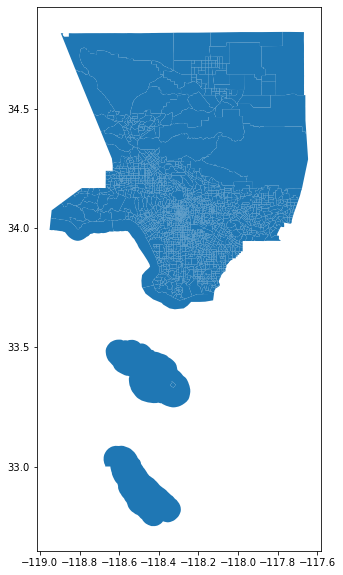

In [21]:
educ.plot (figsize= (10,10))

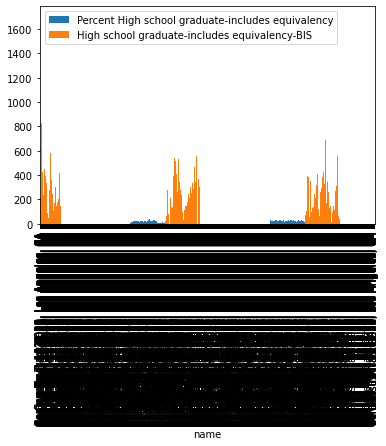

In [27]:
educ[["name","Percent High school graduate-includes equivalency","High school graduate-includes equivalency-BIS"]].plot(x="name", kind="bar")

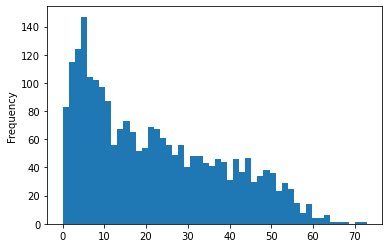

In [25]:
educ['Percent Less than high school graduate'].plot.hist(bins=50)

In [26]:
educ['Percent Less than high school graduate'].describe()

count    2326.000000
mean       21.962478
std        16.420314
min         0.000000
25%         7.433204
50%        18.611171
75%        34.631031
max        72.920252
Name: Percent Less than high school graduate, dtype: float64

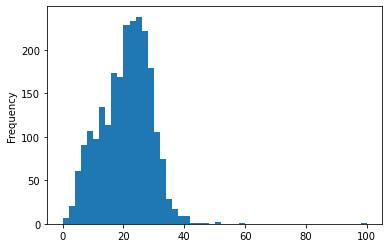

In [28]:
educ['Percent High school graduate-includes equivalency'].plot.hist(bins=50)

In [29]:
educ['Percent High school graduate-includes equivalency'].describe()

count    2326.000000
mean       20.843651
std         8.210558
min         0.000000
25%        15.103446
50%        21.715602
75%        26.620060
max       100.000000
Name: Percent High school graduate-includes equivalency, dtype: float64

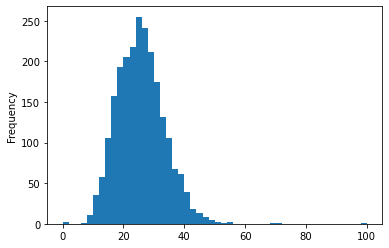

In [30]:
educ['Percent Some college or associates degree'].plot.hist(bins=50)


In [31]:
educ['Percent Some college or associates degree'].describe()

count    2326.000000
mean       25.793068
std         7.821680
min         0.000000
25%        20.237934
50%        25.439898
75%        30.645108
max       100.000000
Name: Percent Some college or associates degree, dtype: float64

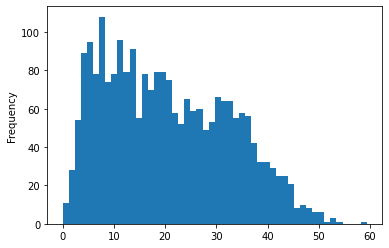

In [32]:
educ['Percent Bachelors degree'].plot.hist(bins=50)

In [33]:
educ['Percent Bachelors degree'].describe()

count    2326.000000
mean       20.474718
std        12.088886
min         0.000000
25%        10.106178
50%        19.003449
75%        30.325530
max        59.396106
Name: Percent Bachelors degree, dtype: float64

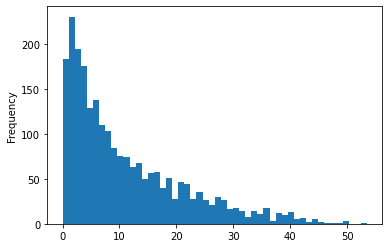

In [34]:
educ['Percent Graduate or professional degree'].plot.hist(bins=50)

In [35]:
educ['Percent Graduate or professional degree'].describe()

count    2326.000000
mean       10.926085
std        10.085957
min         0.000000
25%         3.052818
50%         7.516238
75%        16.320507
max        53.456221
Name: Percent Graduate or professional degree, dtype: float64

In [44]:
educ_sorted = educ.sort_values(by='total',ascending = False)

- The following charts are the overall data on the various levels of educational attainment. I wanted to combine all groups into one table but failed horribly. It can be helpful to get more help on how to do this. I wanted to see in a line chart the variation of educational attainment. I realized that there are many census tracts, so I would ideally like to randomly select 20-50 and populate that information in a chart. 

In [45]:
educ_sorted.head (10)

geoid                                   name   total  \
923   14000US06037275602  Census Tract 2756.02, Los Angeles, CA  9145.0   
2147  14000US06037702901  Census Tract 7029.01, Los Angeles, CA  8133.0   
2198  14000US06037901004  Census Tract 9010.04, Los Angeles, CA  8017.0   
2206  14000US06037901205  Census Tract 9012.05, Los Angeles, CA  7098.0   
994   14000US06037300600     Census Tract 3006, Los Angeles, CA  7044.0   
532   14000US06037206020  Census Tract 2060.20, Los Angeles, CA  6889.0   
2107  14000US06037700200     Census Tract 7002, Los Angeles, CA  6781.0   
2236  14000US06037910705  Census Tract 9107.05, Los Angeles, CA  6519.0   
1938  14000US06037577603  Census Tract 5776.03, Los Angeles, CA  6346.0   
1844  14000US06037571200     Census Tract 5712, Los Angeles, CA  6328.0   

      Less than high school graduate  \
923                            148.0   
2147                            89.0   
2198                           825.0   
2206                           533.0   
994                            508.0   
532                           2316.0   
2107                           109.0   
2236                          1702.0   
1938                           338.0   
1844                           352.0   

      High school graduate-includes equivalency  \
923                                       246.0   
2147                                      808.0   
2198                                     2019.0   
2206                                     1548.0   
994                                      1120.0   
532                                      2326.0   
2107                                      745.0   
2236                                     1791.0   
1938                                      390.0   
1844                                     1133.0   

      Some college or associates degree  Bachelors degree  \
923                              1653.0            3799.0   
2147                             1484.0            3975.0   
2198                             2605.0            1757.0   
2206                             3052.0            1147.0   
994                              2017.0            2233.0   
532                              1684.0             386.0   
2107                             1827.0            3059.0   
2236                             2072.0             859.0   
1938                             1796.0            2011.0   
1844                             2578.0            1414.0   

      Graduate or professional degree  Born in state of residence-BIS  \
923                            3299.0                          3071.0   
2147                           1777.0                          2526.0   
2198                            811.0                          4488.0   
2206                            818.0                          4628.0   
994                            1166.0                          2296.0   
532                             177.0                          4714.0   
2107                           1041.0                          2153.0   
2236                             95.0                          2753.0   
1938                           1811.0                          3068.0   
1844                            851.0                          3465.0   

      Less than high school graduate-BIS  ...  \
923                                 61.0  ...   
2147                                67.0  ...   
2198                               404.0  ...   
2206                               318.0  ...   
994                                101.0  ...   
532                               1689.0  ...   
2107                                15.0  ...   
2236                               250.0  ...   
1938                                25.0  ...   
1844                                87.0  ...   

      Percent Less than high school graduate  \
923                                 1.618371   
2147                                1.094307   
2198                          

# Maps

I first began plotting maps by creating subplots of the top 10 or 100 census tracts and various educational attainment levels. These maps don’t tell me much, so I moved on to maps comparing different Educational Attainment groups. 

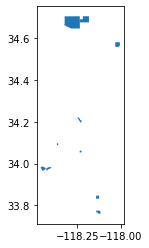

In [46]:
educ_sorted.head(10).plot()

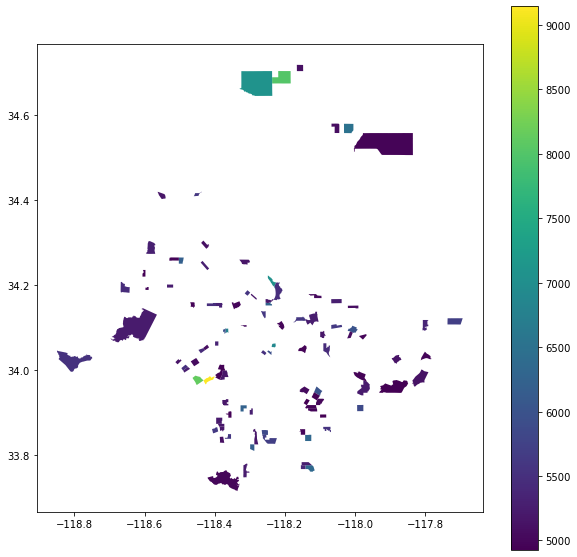

In [47]:
educ_sorted.head(100).plot(figsize=(10,10),column='total',legend=True)

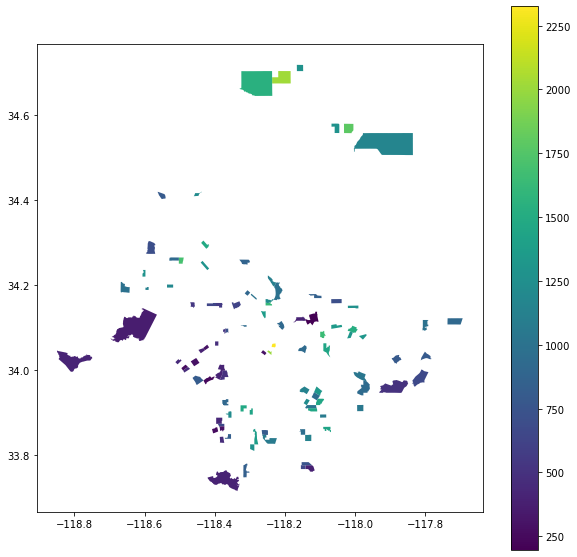

In [48]:
educ_sorted.head(100).plot(figsize=(10,10),column='High school graduate-includes equivalency',legend=True)

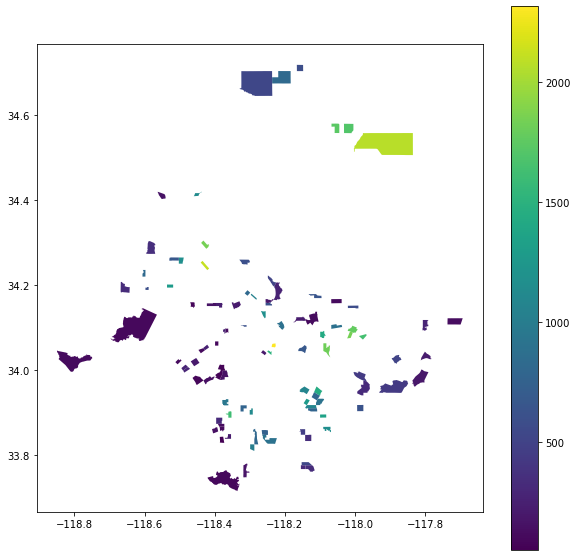

In [49]:
educ_sorted.head(100).plot(figsize=(10,10),column='Less than high school graduate',legend=True)

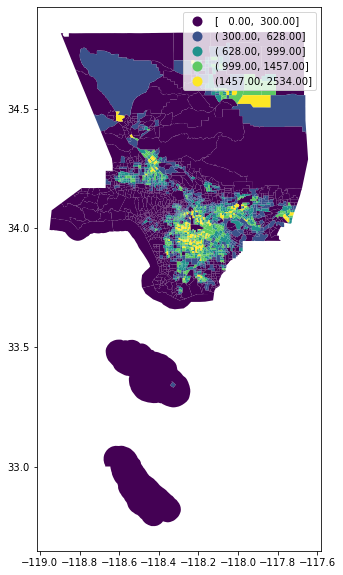

In [50]:
educ.plot(figsize=(12,10),
                 column='Less than high school graduate',
                 legend= True, 
                 scheme='naturalbreaks')

- In the following map, I subplot the percent of individuals with less than a high school degree and Individuals with a Graduate or professional degree. I used two different types of colors and an equal interval scheme to evenly distribute the percentages. 

Text(0.5, 1.0, 'Percent of Individuals with a Graduate or professional degree')

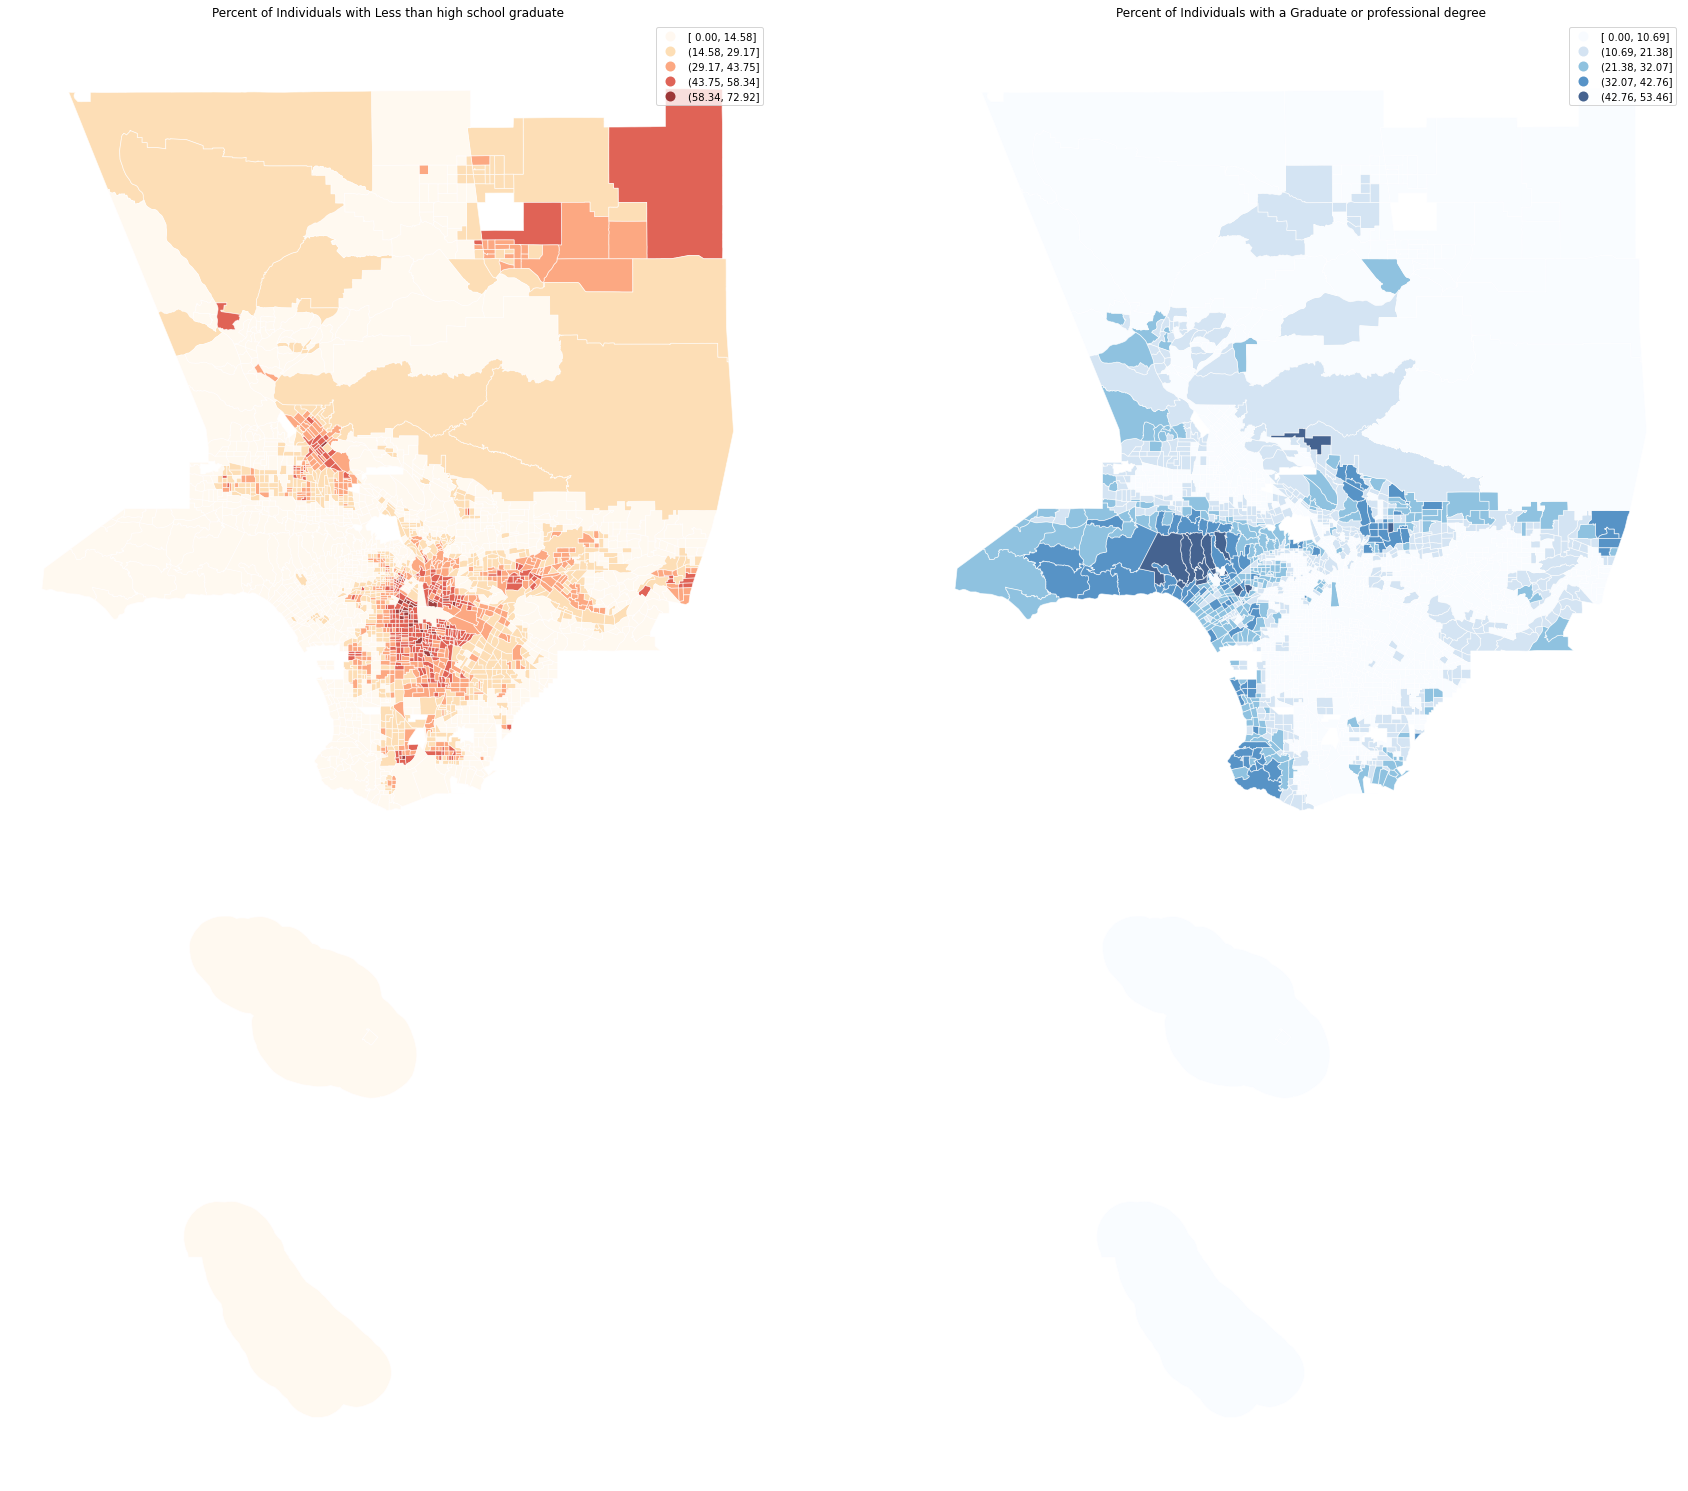

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(30, 30))


ax1, ax2 = axs


educ.plot(column='Percent Less than high school graduate', 
            cmap='OrRd', 
            scheme='equal_interval',
            k=5, 
            edgecolor='white', 
            linewidth=0.75, 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent of Individuals with Less than high school graduate")


educ.plot(column='Percent Graduate or professional degree', 
            cmap='Blues', 
            scheme='equal_interval',
            k=5, 
            edgecolor='white', 
            linewidth=0.75, 
            alpha=.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent of Individuals with a Graduate or professional degree")

- This map was not surprising, but the blue graph's large white space clearly shows that areas with lower incomes and more people of color also don’t have many professional degrees. When I look more in-depth at occupations, this will be helpful because folks' jobs in these areas might be less skilled jobs and possibly jobs lost during covid-19.

- In the following map, I wanted to look at the Percent of Foreign-born with less than a high school degree compared to the overall percentage of individuals with less than a high school degree. I wanted to see if other census tracts held higher rates of people without high school degrees and if being foreign-born changed the areas with the highest percentages.

Text(0.5, 1.0, 'Percent of Individuals with Less Than High School Graduate- Total')

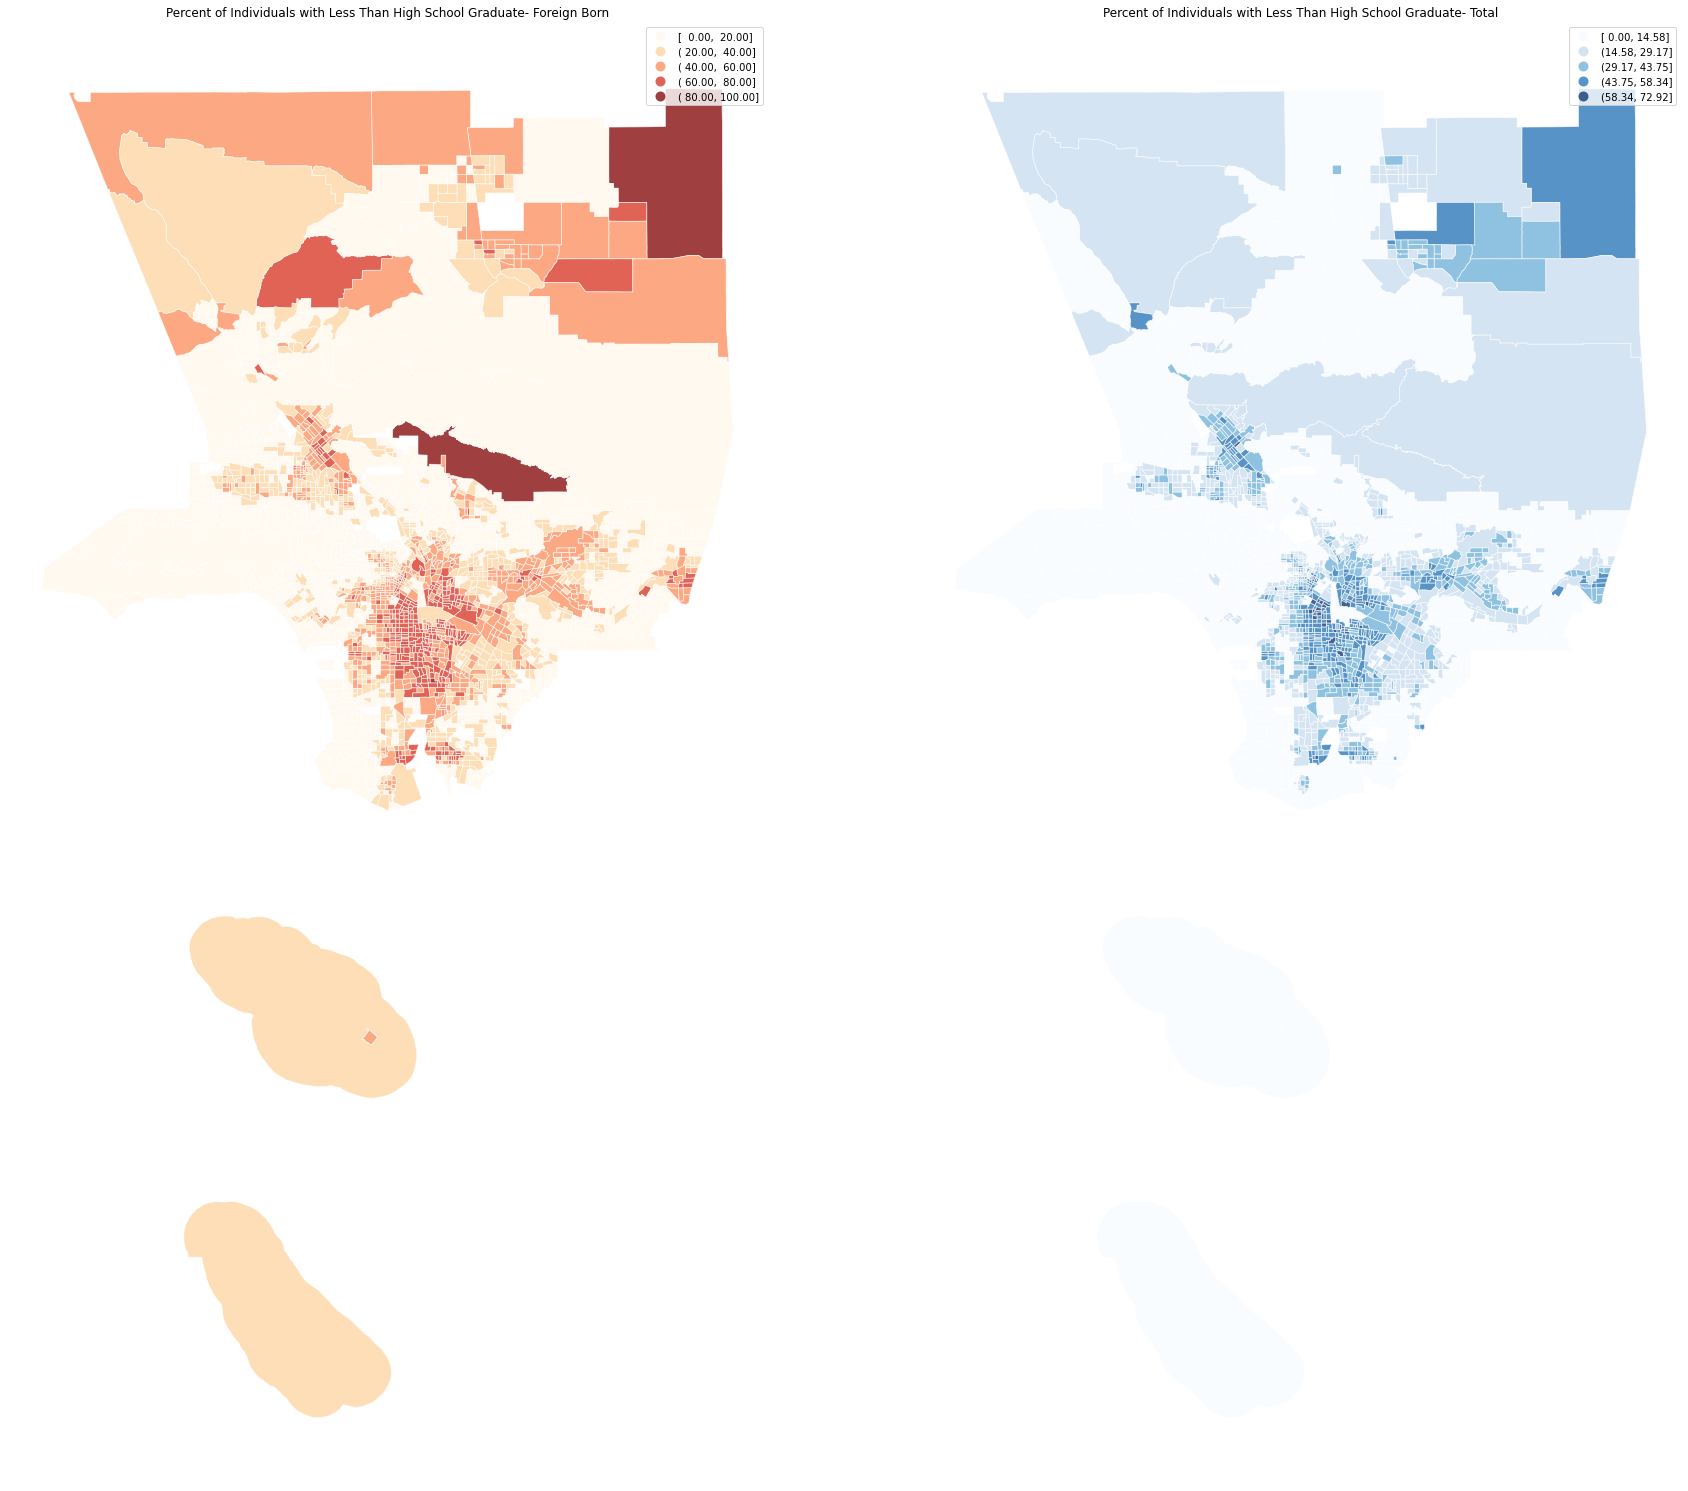

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(30, 30))


ax1, ax2 = axs


educ.plot(column='Percent Less than high school graduate-FB', 
            cmap='OrRd', 
            scheme='equal_interval',
            k=5, 
            edgecolor='white', 
            linewidth=0.75, 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent of Individuals with Less Than High School Graduate- Foreign Born")


educ.plot(column='Percent Less than high school graduate', 
            cmap='Blues', 
            scheme='equal_interval',
            k=5, 
            edgecolor='white', 
            linewidth=0.75, 
            alpha=.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent of Individuals with Less Than High School Graduate- Total")

- I don't see any real change, but I am curious about that large dark red area, where is it and why is it shaded in that shape. 

- The following maps show census tracts with 30 percent of individuals who hold less than a high school degree. 

In [41]:
educ_web_mercator = educ.to_crs(epsg=3857)

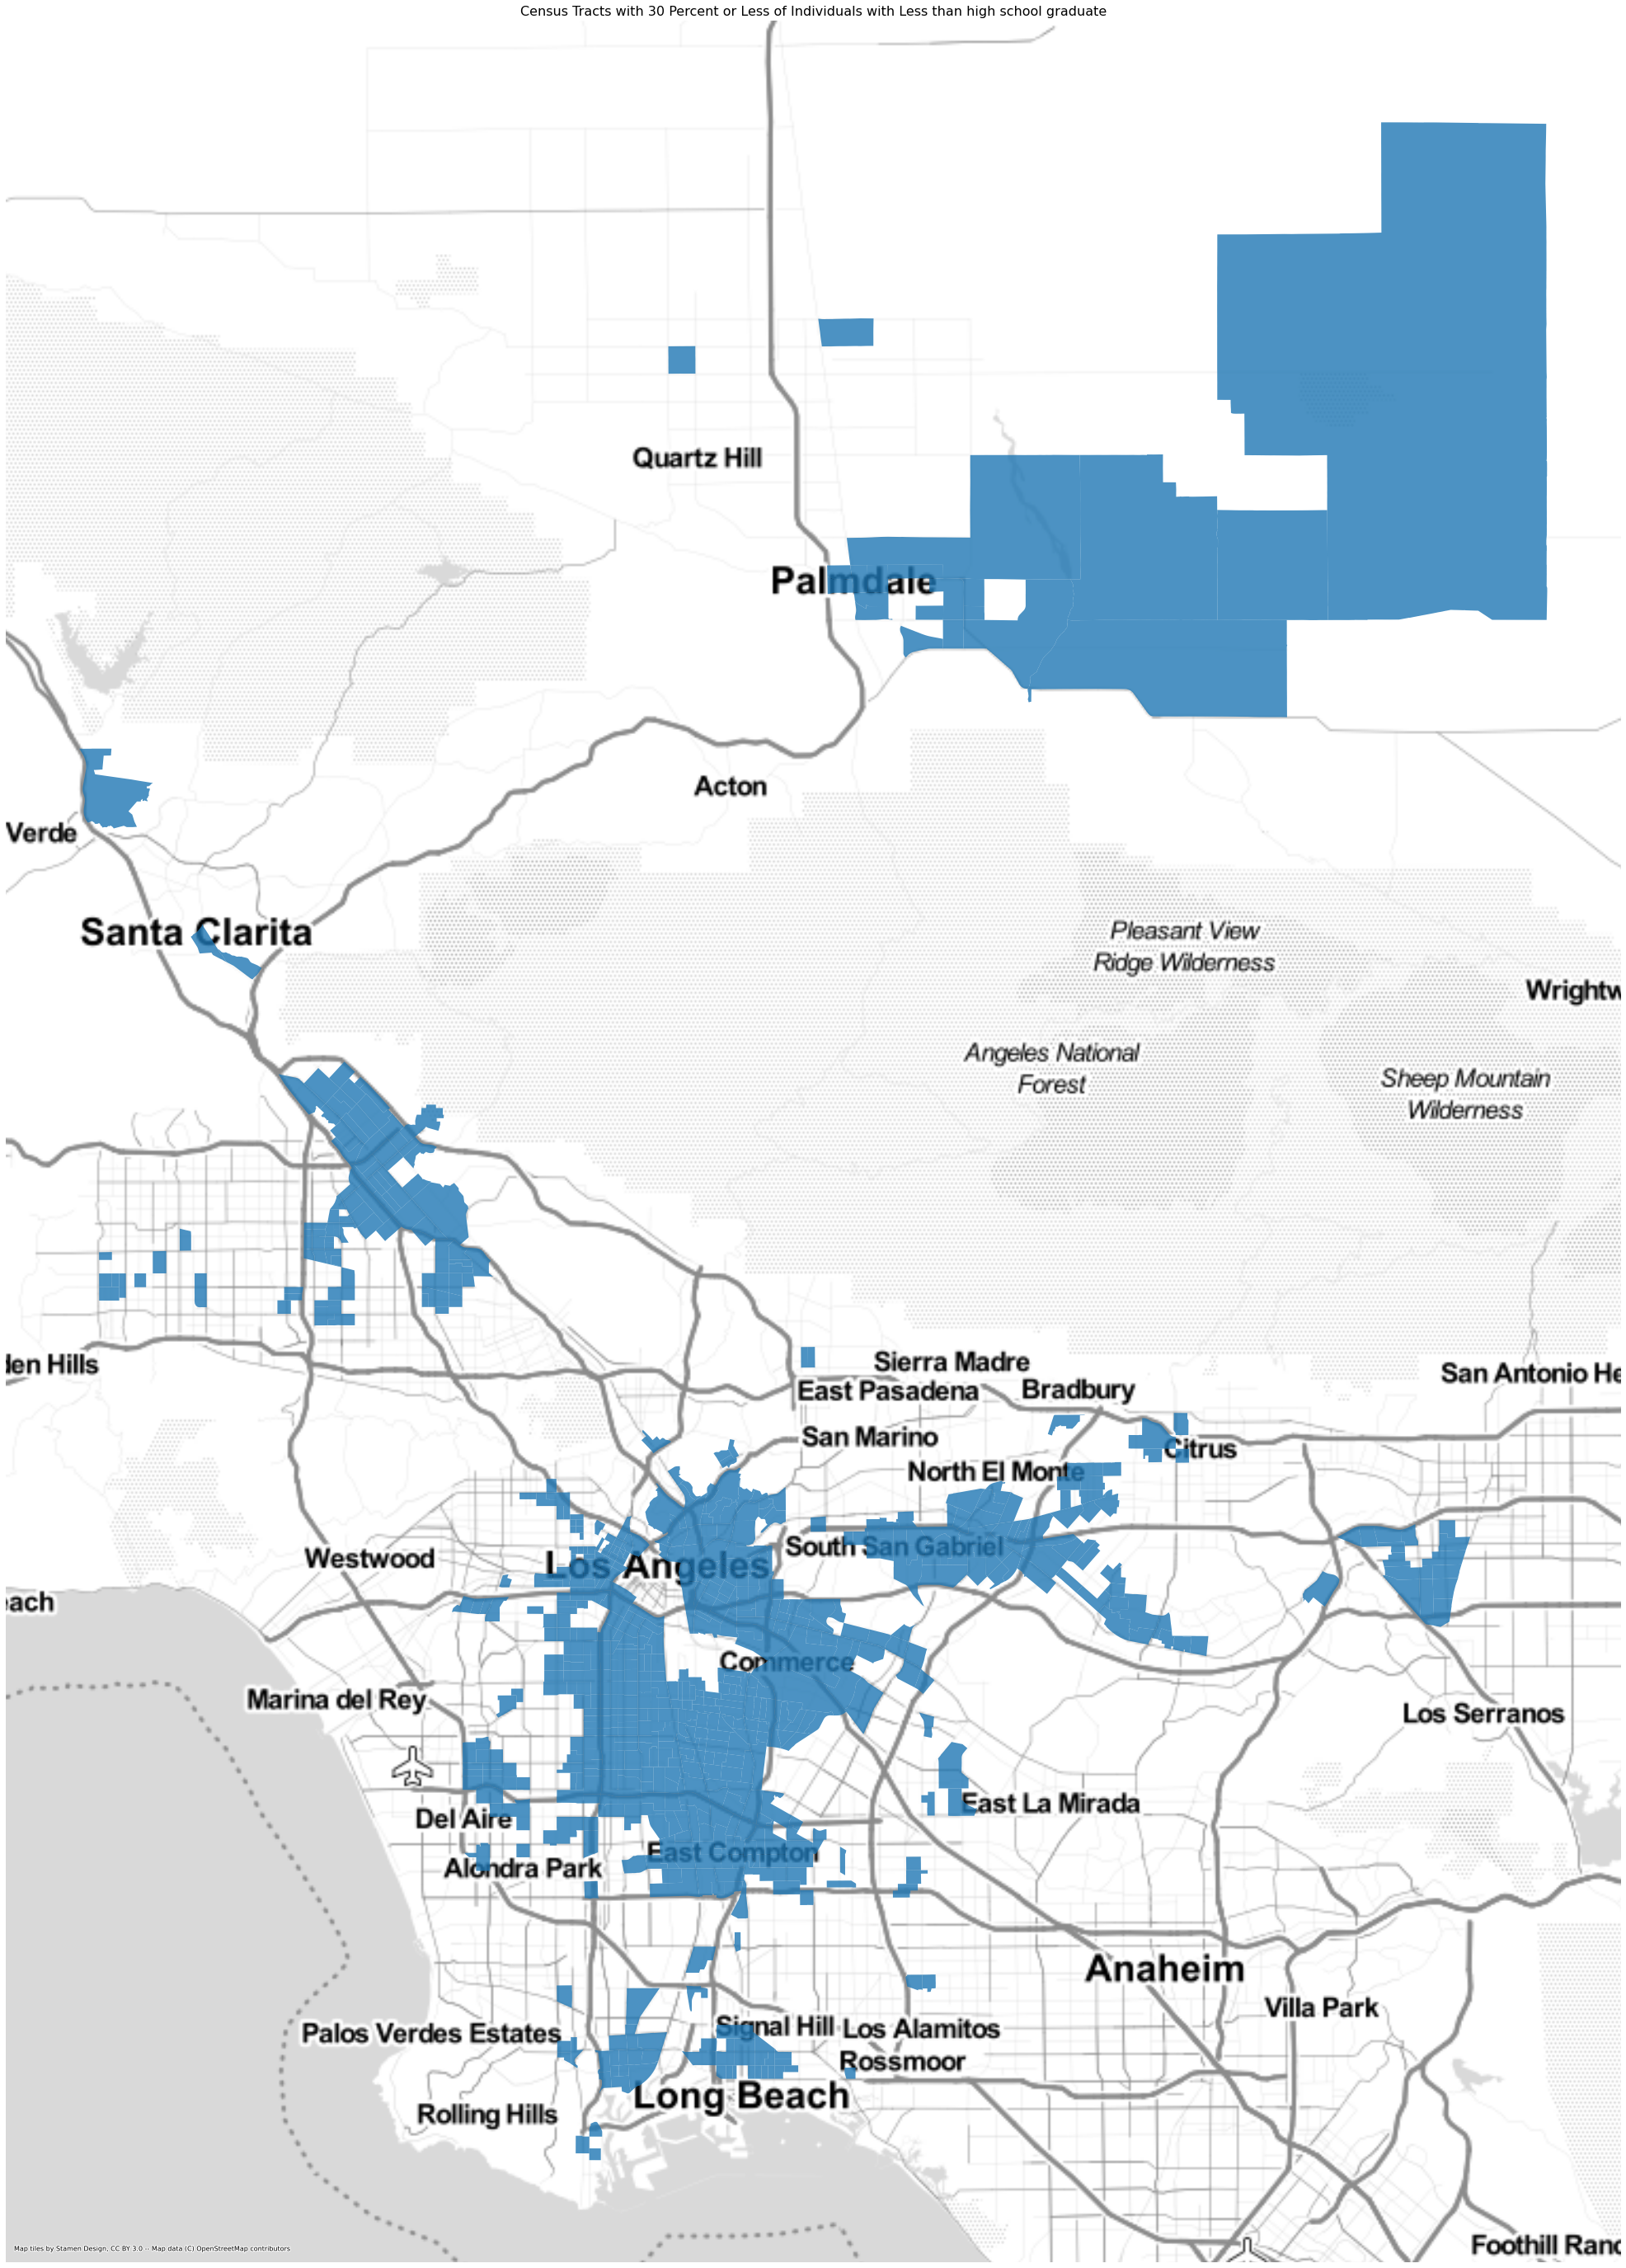

In [42]:
fig, ax = plt.subplots(figsize=(50, 50))

educ_web_mercator[educ_web_mercator['Percent Less than high school graduate'] > 30].plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('Census Tracts with 30 Percent or Less of Individuals with Less than high school graduate',fontsize=16)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

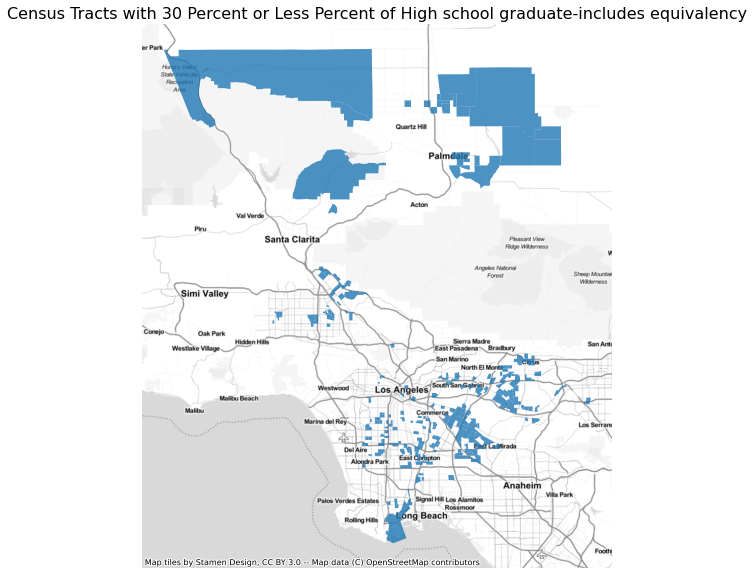

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))

educ_web_mercator[educ_web_mercator['Percent High school graduate-includes equivalency'] > 30].plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('Census Tracts with 30 Percent or Less Percent of High school graduate-includes equivalency',fontsize=16)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

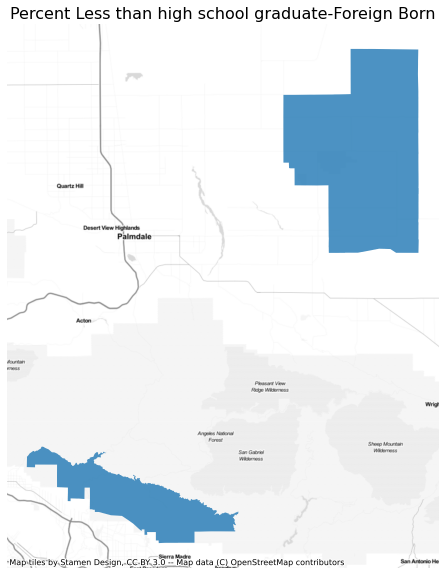

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))

educ_web_mercator[educ_web_mercator['Percent Less than high school graduate-FB'] > 90].plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('Percent Less than high school graduate-Foreign Born',fontsize=16)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

- I wanted to see where the neighborhoods with the most percentages of individuals with less than a high school degree. The map above also zooms in on the area I was curious about above. It's in the mountains, so I'm not actually sure what to make of this. 